정책 반복 알고리즘 학습 시작...
정책이 3번째 반복에서 수렴했습니다.
학습 완료! 소요 시간: 0.56초

=== 학습된 정책으로 Agent 이동 테스트 ===


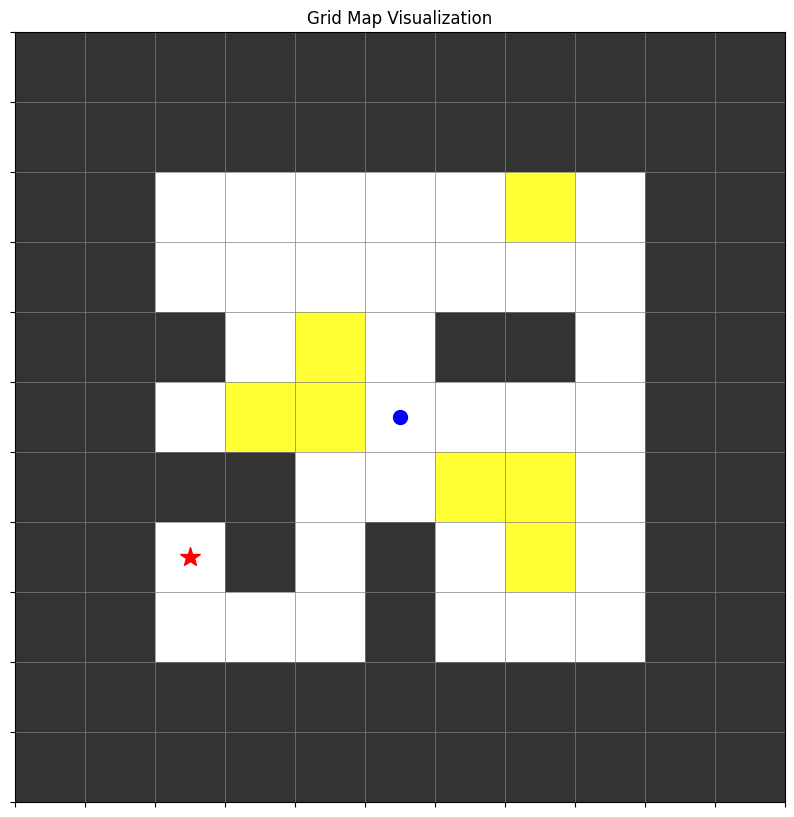


Step 1: DOWN 방향으로 이동
이전 위치: (5, 5)
새로운 위치: (5, 6)


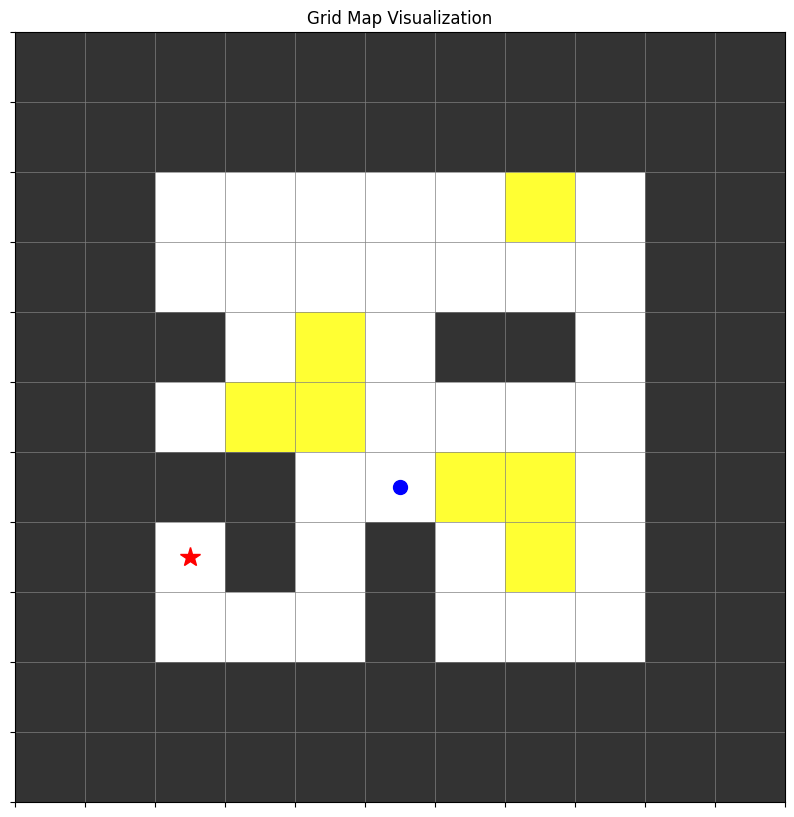


Step 2: LEFT 방향으로 이동
이전 위치: (5, 6)
새로운 위치: (4, 6)


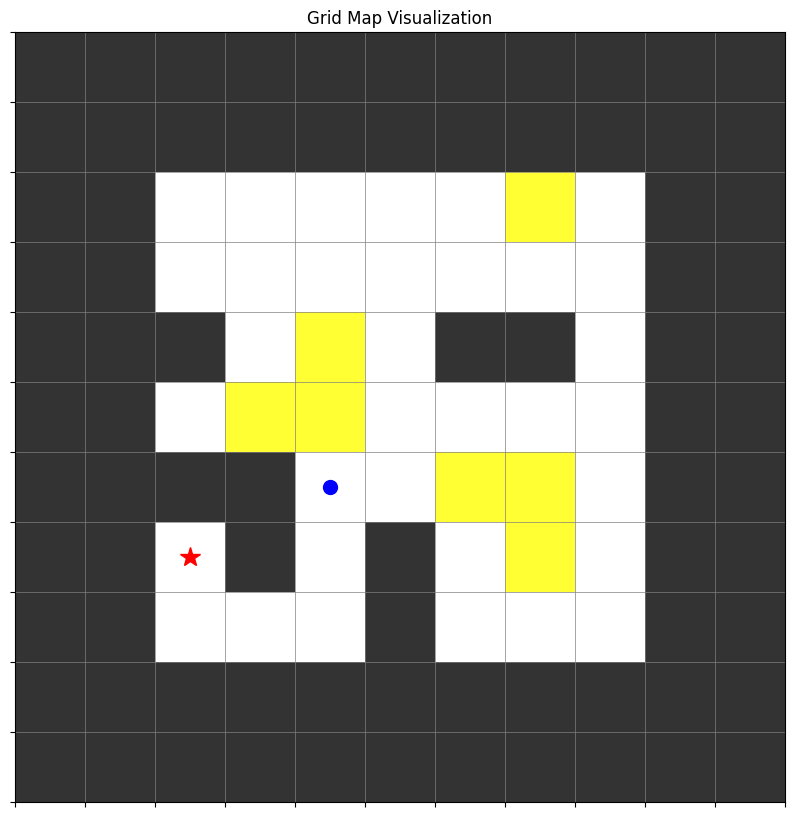


Step 3: DOWN 방향으로 이동
이전 위치: (4, 6)
새로운 위치: (4, 7)


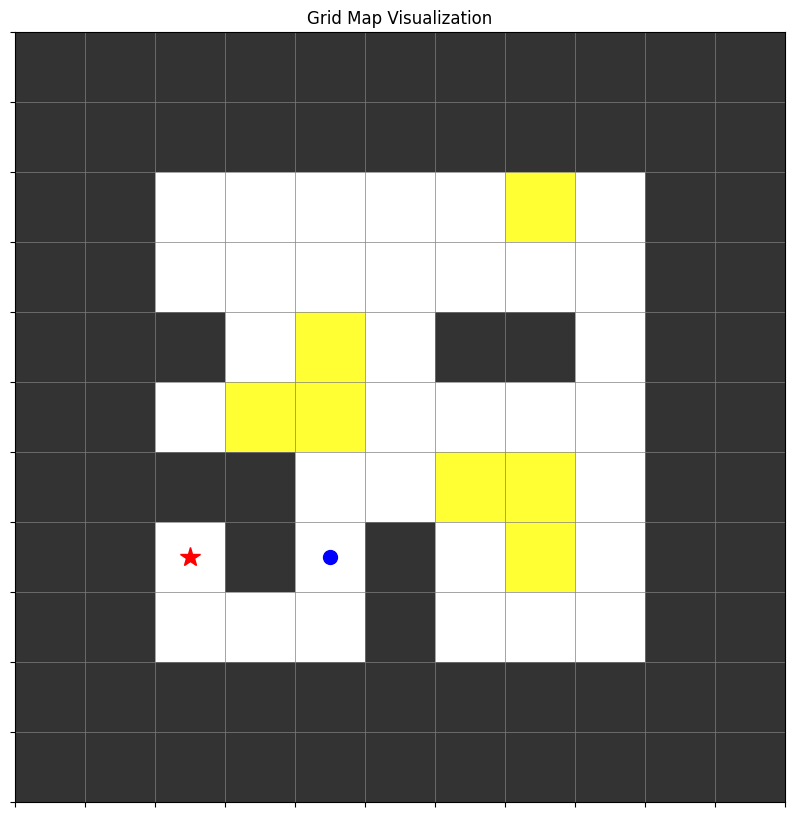


Step 4: DOWN 방향으로 이동
이전 위치: (4, 7)
새로운 위치: (4, 8)


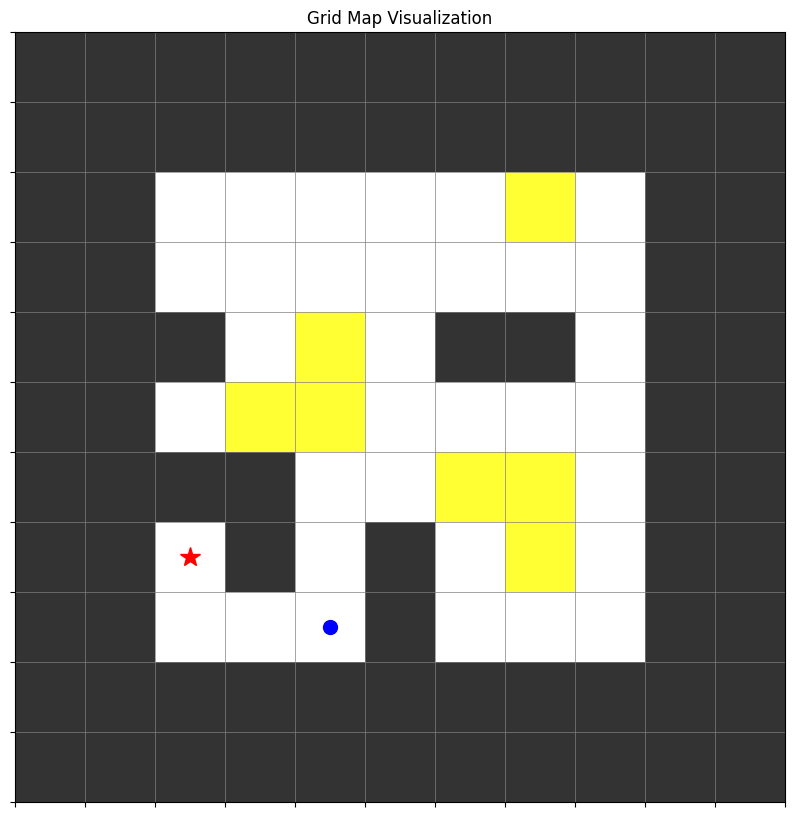


Step 5: LEFT 방향으로 이동
이전 위치: (4, 8)
새로운 위치: (3, 8)


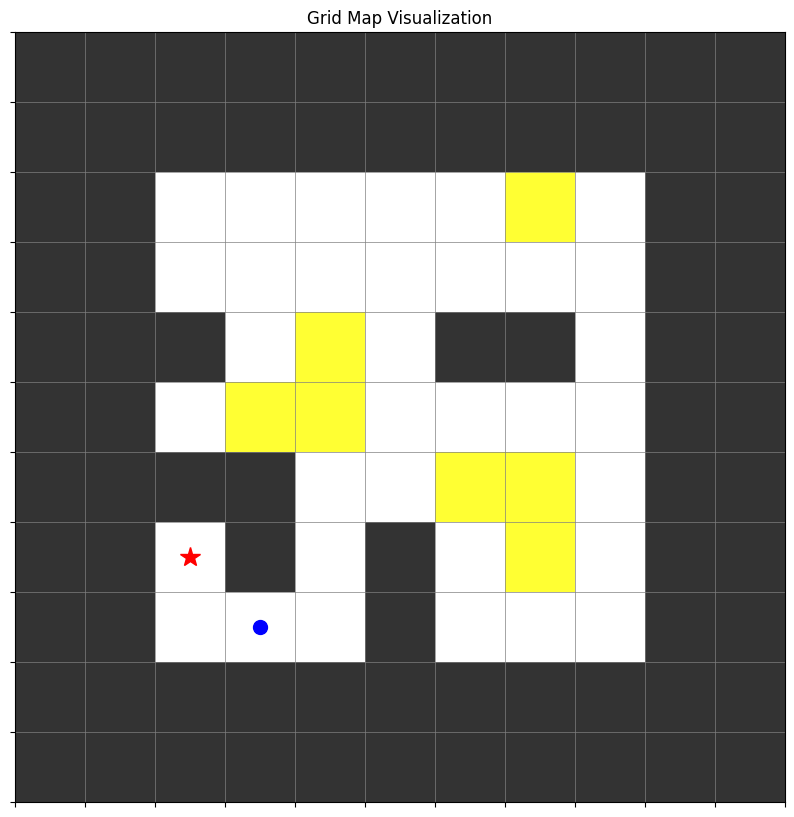


Step 6: LEFT 방향으로 이동
이전 위치: (3, 8)
새로운 위치: (2, 8)


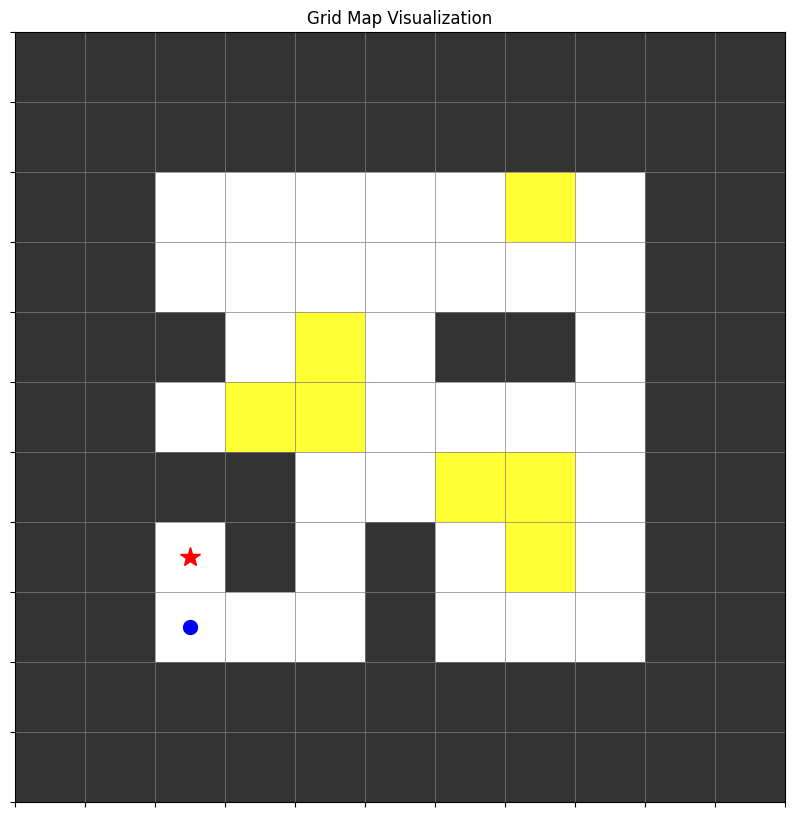


Step 7: UP 방향으로 이동
이전 위치: (2, 8)
새로운 위치: (2, 7)


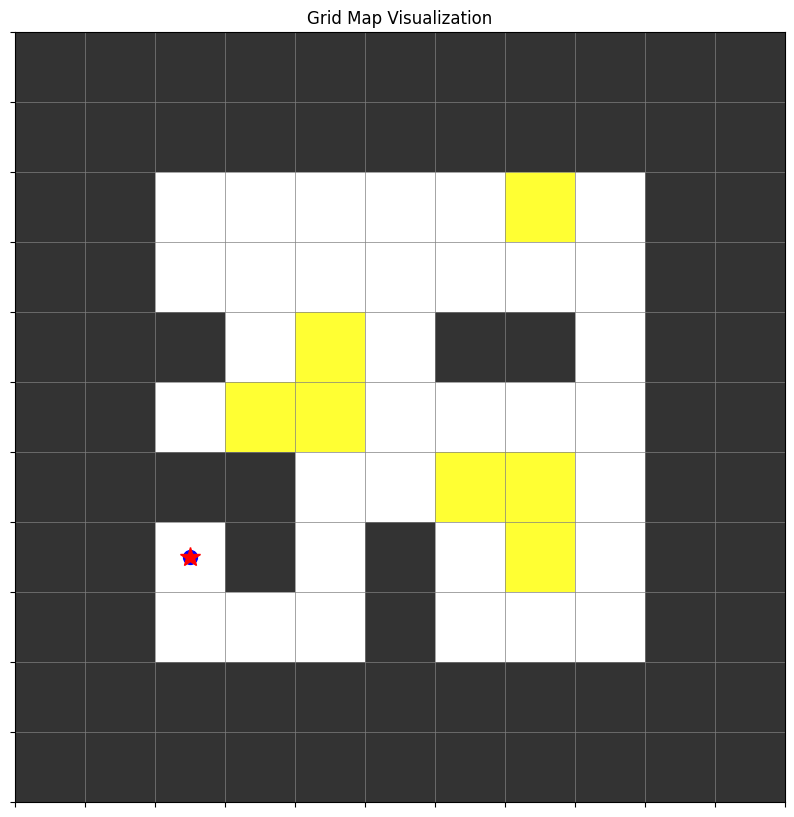


목표에 도달했습니다! 걸음 수: 7


In [1]:
from environment.grid_map import GridMap
from agent import Agent
from scenarios.scenarios import ScenarioFactory
from model.policy_iteration import PolicyIteration
from visualize.grid_visualize import visualize_map
import time

def test_policy_iteration():
    # 1. 환경 초기화
    grid_map = GridMap(size=7, padding=2, seed=40)
    
    # 2. 벽과 공사중인 경로 추가
    grid_map.add_random_walls(num_walls=5)
    grid_map.add_random_construction(num_construction=5)
    
    # 3. 시나리오 생성 (시나리오1 사용)
    scenario = ScenarioFactory.create_scenario(
        scenario_type="시나리오1",
        grid_map=grid_map,
        agent_pos=grid_map.agent_pos
    )
    scenario.generate_goals()

    # 4. Agent 초기화
    agent = Agent(grid_map.agent_pos)
    
    # 5. Policy Iteration 초기화 및 학습
    policy_iteration = PolicyIteration(grid_map, scenario.get_goals())
    print("정책 반복 알고리즘 학습 시작...")
    start_time = time.time()
    policy_iteration.train()
    end_time = time.time()
    print(f"학습 완료! 소요 시간: {end_time - start_time:.2f}초")
    
    # 6. 학습된 정책으로 Agent 이동 테스트
    print("\n=== 학습된 정책으로 Agent 이동 테스트 ===")
    max_steps = 100
    step = 0
    
    while step < max_steps:
        # 현재 상태 시각화
        visualize_map(grid_map, agent, goals=scenario.get_goals(), scenario_type="시나리오1")
        
        # 목표 도달 확인
        if agent.pos in scenario.get_goals():
            print(f"\n목표에 도달했습니다! 걸음 수: {step}")
            break
        
        # 학습된 정책에 따라 행동 선택
        action = policy_iteration.get_action(agent.pos)
        print(f"\nStep {step + 1}: {action.name} 방향으로 이동")
        
        # Agent 이동
        old_pos = agent.pos
        new_pos = agent.move(action)
        print(f"이전 위치: {old_pos}")
        print(f"새로운 위치: {new_pos}")
        
        # 같은 위치에 머무는 경우 (벽이나 공사중인 경로에 부딪힌 경우)
        if old_pos == new_pos:
            print("이동할 수 없는 위치입니다.")
        
        step += 1
        time.sleep(0.5)  # 시각화를 위한 대기
    
    if step >= max_steps:
        print("\n최대 걸음 수에 도달했습니다.")

if __name__ == "__main__":
    test_policy_iteration() 